# 필사한 데이터셋 원본

https://www.kaggle.com/code/rajeevnair676/airline-satisfaction-xgboost-96-accuracy

#✈ 항공 승객 만족도 ✈
*“한 번 하늘을 맛본 사람은, 평생 땅 위를 걷더라도 시선은 늘 하늘을 향하게 된다. 왜냐하면 그는 하늘을 경험했기 때문이며, 그곳으로 다시 돌아가길 언제나 갈망할 것이기 때문이다."*

–  Leonardo da Vinci

### ✈️ Airline Passenger Satisfaction 데이터셋 컬럼 설명

| 컬럼명                          | 설명 |
|--------------------------------|------|
| Gender                         | 승객의 성별 (Female, Male) |
| Customer Type                  | 고객 유형 (Loyal Customer, Disloyal Customer) |
| Age                            | 승객의 나이 |
| Type of Travel                 | 여행 유형 (Business travel, Personal Travel) |
| Class                          | 탑승 클래스 (Business, Eco, Eco Plus) |
| Flight Distance                | 비행 거리 |
| Inflight wifi service          | 기내 와이파이 만족도 (0: 없음, 1 ~ 5: 매우 불만족~만족) |
| Departure/Arrival time convenient | 출발/도착 시간의 편의성 만족도 (1~5) |
| Ease of Online booking         | 온라인 예약의 용이성 만족도 (1~5) |
| Gate location                  | 탑승구 위치 만족도 (1~5) |
| Food and drink                 | 기내 음식 및 음료 만족도 (1~5) |
| Online boarding                | 온라인 탑승 절차 만족도 (1~5) |
| Seat comfort                   | 좌석 편안함 만족도 (1~5) |
| Inflight entertainment         | 기내 엔터테인먼트 만족도 (1~5) |
| On-board service               | 기내 서비스 만족도 (1~5) |
| Leg room service               | 다리 공간 만족도 (1~5) |
| Baggage handling               | 수하물 처리 만족도 (1~5) |
| Check-in service               | 체크인 서비스 만족도 (1~5) |
| Inflight service               | 기내 전반적 서비스 만족도 (1~5) |
| Cleanliness                    | 청결도 만족도 (1~5) |
| Departure Delay in Minutes     | 출발 지연 시간 (분) |
| Arrival Delay in Minutes       | 도착 지연 시간 (분) |
| Satisfaction                   | 전반적 만족도 (Satisfied / Neutral or Dissatisfied) |


#배경 설명

팬데믹 이후 항공 산업은 큰 타격을 입었다. ICAO(국제민간항공기구)에 따르면,

2020년 항공 산업은 **3710억 달러의 손실**을 입었고,

**감소된 좌석 수용력으로 인해 3290억 달러의 추가 손실**이 발생했다.

🎯따라서 이러한 경기 침체 속에서 **항공 산업을 회복**시키기 위해,
무엇보다도 **고객의 불만 요인을 정확히 이해**하고,
**제공 서비스에 대한 만족도를 향상**시키는 것이 절대적으로 필요하다.

# 문제 정의 (PROBLEM STATEMENT)
이 문제의 목적은 **고객 만족도에 영향을 미치는 주요 요인들을 식별**하는 것이다.

데이터를 본격적으로 분석하기 전에,
직관적으로 생각해보고,
또 여행을 자주 다니는 사람으로서의 나의 경험에 비춰볼 때,
고객 만족도에 영향을 미치는 주요 요인은 다음과 같다고 본다:

- 비행 지연

- 고객 요구에 대응하는 승무원의 효율성

- 기내에서 제공되는 서비스의 질

느낀점: 사회적배경에 따른 문제정의가 확실하다. 사전조사가 되어서 정확한 수치를 제시하면서 문제를 정의하니 그 심각성을 확실히 알고 이 분석의 필요성을 실감하게 되었다.

문제정의를 하면서 자신의 경험에 빗대어서 가설을 설정하고 있는 것을 확인할 수 잇다

# EXPLORE THE DATA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score

# import warnings
# warnings.simplefilter('ignore')

✅ warning.simplefiter('ignore')

- "구버전이다, inplace=True가 나중에 사라질 예정이다"라는 등의 경고메시지가 출력되지 않도록 차단하는 기능
    - 노트북에서 결과만 보고 싶을 때,
    - 반복 작업 중에 경고가 너무 자주 뜰 때 사용
- 하지만 정말 필요한 경고 메시지가 뜰 수도 있어서, 분석을 완료 한 뒤, 최종 사용자에게만 숨기고 싶을 때 사용하는 것을 권장한다.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DArt-B 5기/kaggle study/airlines/train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
def data_explore(df):
    print("DATA EXPLORATION")
    print("*" * 70)
    print("Shape of dataset : ", df.shape)
    print("*" * 70)
    print(df.info())
    print("*" * 70)
    print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
    print("*" * 70)
    print(df.describe())
    print("*" * 70)
    print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
    print("*" * 70)
    print(df.describe(include='object'))
    print("*" * 70)
    print("MISSING VALUES")
    print("*" * 70)
    print(df.isnull().sum())
    print("*" * 70)
    print("MISSING VALUES IN %")
    print("*" * 70)
    print(df.isnull().mean() * 100)
    print("*" * 70)


처음보는 함수였음,
사용자 정의 함수인듯 힌데, 노트북상에 함수를 정의하는 부분이 없어서 최대한 유사하게 직접 정의함

In [ ]:
data_explore(df)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (103904, 25)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 

✅확인 결과
- 비행 지연의 평균은 15분, 표준편차는 38분
- 지연 시간의 중앙값은 0분

    ➡️ 전체 항공의 50%는 지연되지 않았음을 의미 (흥미로운 부분!🌱)
- 여성 승객의 수가 좀 더 많음

# 데이터 전처리
범주형과 수치형 변수로 분류

In [ ]:
#분석에 불필요한 Id, Unnamed:0 변수를 제거
df.drop(['Unnamed: 0','id'], axis=1, inplace=True)

In [ ]:
#범주형 변수 분류
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*' * 60)
print('Categorical variables column name:' , cat_features)

Number of categorical variables:  5
************************************************************
Categorical variables column name: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [ ]:
#수치형 변수 분류
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(num_features))
print('*' * 60)
print('Numerical variables column name:' , num_features)

Number of numerical variables:  18
************************************************************
Numerical variables column name: ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


# 시각화 및 인사이트 도출
- 각 변수들에서 나타나는 특정한 패턴을 시각화해서 피쳐 선택과 데이터를 이해하는 단계

## 시각화 - 범주형 변수

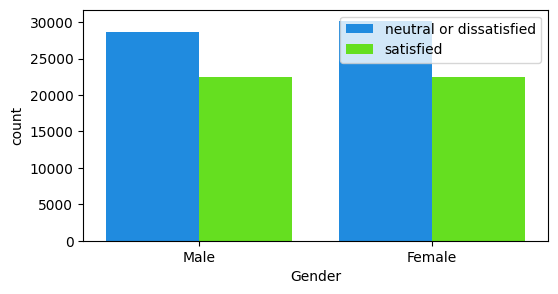

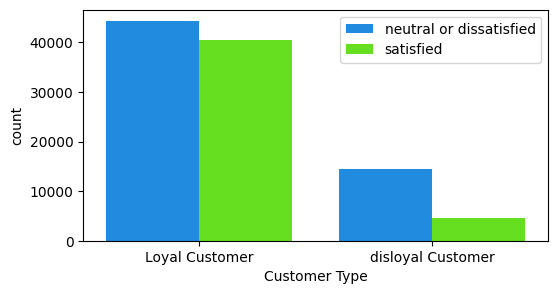

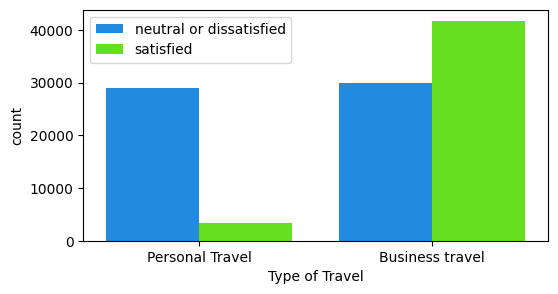

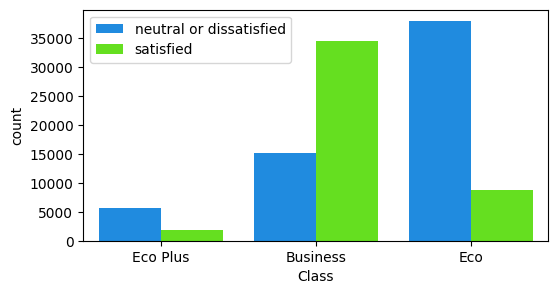

In [ ]:
for col in cat_features[:-1]:  #[:-1]은 슬라이싱 ▶ 마지막 요소(satisfaction)을 제외한 전부를 가져오라는 코
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=df, x=col, hue='satisfaction', palette='gist_rainbow_r')
    plt.legend()

**그래프에서 확인한 정보**
- 성별은 둘이 똑같은 양상을 보이는걸로 보아 만족도를 고려하는 부분에서 중요한 변수는 아닌 것같음

- 이 항공사에는 많은 loyal 고객들이 있음. 하지만 불만족과 그저 그렇다라는 평을 나타내는 고객들이 많음.

    ➡️ 항공사 측에서는 신경써야하는 부분

- 상용고객들이 일반 여행 고객들보다 만족하는 횟수가 더 많음
- 비즈니스 클래스의 사람들은 대부분 만족스러워보이지만, 이코노미 글래스의 사람을이 만족한 횟수는 가장 적다

**수치로 확인**

In [ ]:
def get_insights(data):
    for cols in cat_features[:-1]:
        cat_group = df.groupby(cols)['satisfaction'].describe() #범주형 변수별로 satisfaction 분포를 분석
        percent = 100 * (cat_group['freq'] / cat_group['count']) #빈도 수의 비율화
        print('*' * 60)
        print("Insights from '{}' data". format(cols))
        print('*' * 60)
        for i in range(0,(len(cat_group))):
            print('{} from {} are {}'. format(round(percent[i],2),percent.index[i], cat_group['top'][i]))
        print("*"*60)

In [ ]:
# 한번 더 따라하기

def get_insights(data):
    for cols in cat_features[:-1]:
        cat_group = df.groupby(cols)['satisfaction'].describe() #범주형 변수별로 만족도와의 분표 요약
        percent = 100 * (cat_group['freq'] / cat_group['count'])
        print('*' * 60)
        print("Insights from '{}' data".format(cols))
        print("*"*60)
        for i in range(0, (len(cat_group))):
            print('{} from {} are {}'.format(round(percent[i],2), percent.index[i], cat_group['top'][i]))
        print('*' * 60)

In [ ]:
get_insights(df)

************************************************************
Insights from 'Gender' data
************************************************************
57.26 from Female are neutral or dissatisfied
56.05 from Male are neutral or dissatisfied
************************************************************
************************************************************
Insights from 'Customer Type' data
************************************************************
52.27 from Loyal Customer are neutral or dissatisfied
76.33 from disloyal Customer are neutral or dissatisfied
************************************************************
************************************************************
Insights from 'Type of Travel' data
************************************************************
58.26 from Business travel are satisfied
89.83 from Personal Travel are neutral or dissatisfied
************************************************************
*******************************************************

<ipython-input-11-5127dfed6fef>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('{} from {} are {}'.format(round(percent[i],2), percent.index[i], cat_group['top'][i]))
<ipython-input-11-5127dfed6fef>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('{} from {} are {}'.format(round(percent[i],2), percent.index[i], cat_group['top'][i]))
<ipython-input-11-5127dfed6fef>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pr

## 시각화- 수치형 변수

<Axes: >

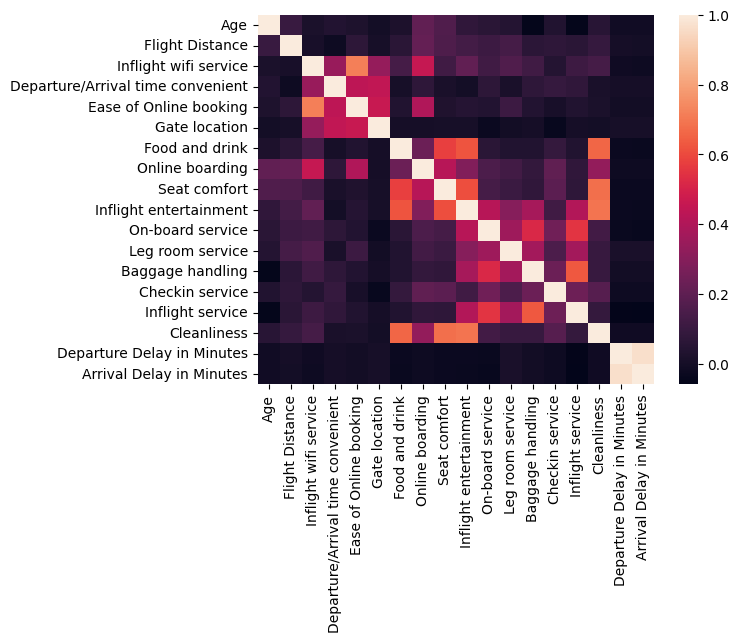

In [ ]:
df_num = df.select_dtypes(include='number')
sns.heatmap(df_num.corr())

<ipython-input-14-ddbe55a7c508>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='satisfaction', y=col, palette='gist_rainbow_r')
<ipython-input-14-ddbe55a7c508>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='satisfaction', y=col, palette='gist_rainbow_r')
<ipython-input-14-ddbe55a7c508>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='satisfaction', y=col, palette='gist_rainbow_r')
<ipython-input-14-ddbe55a7c508>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

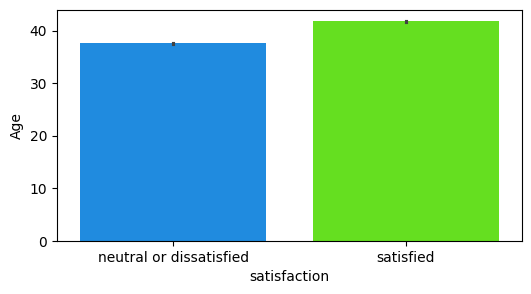

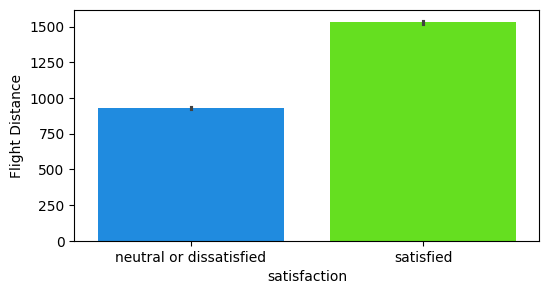

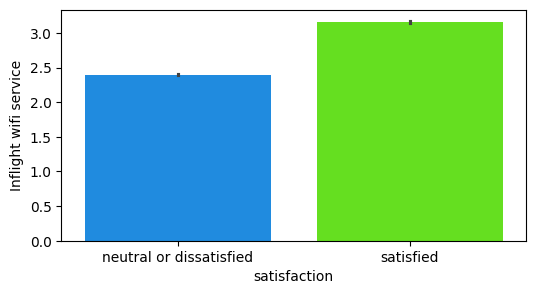

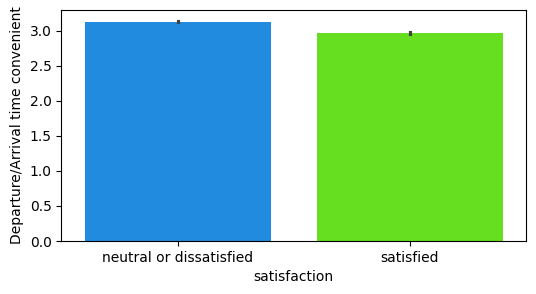

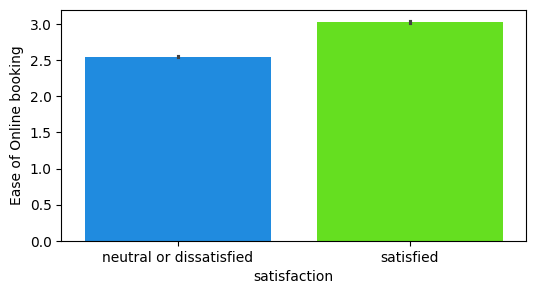

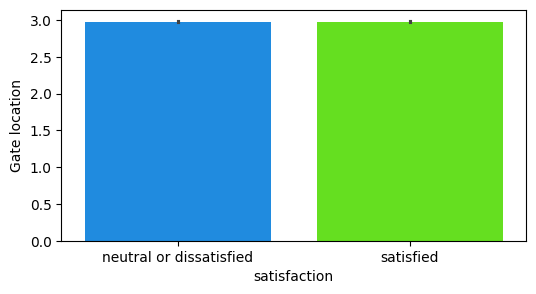

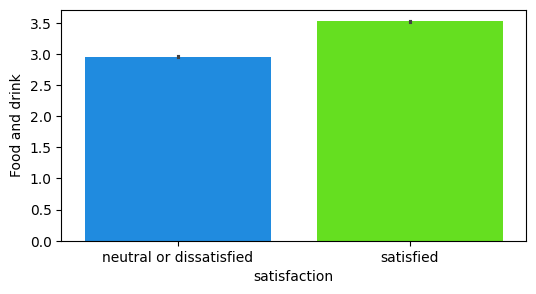

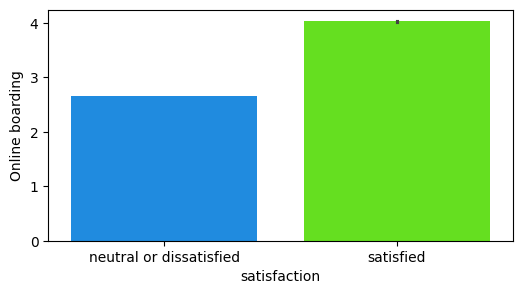

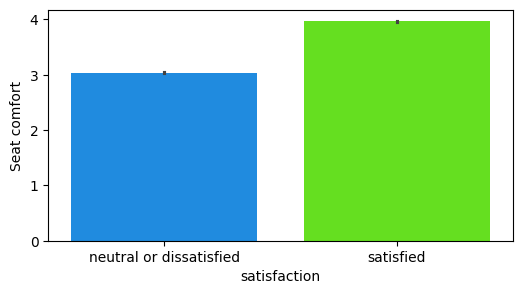

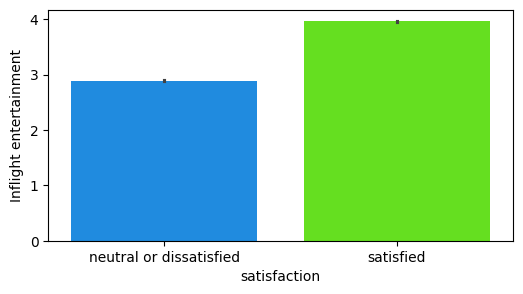

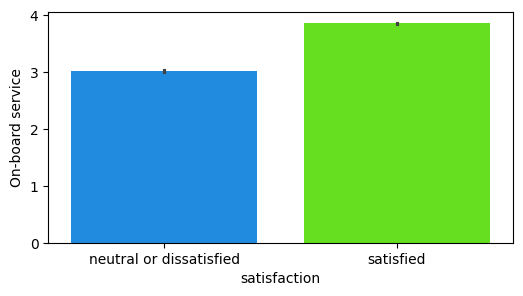

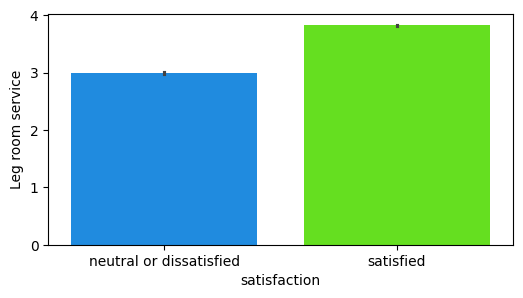

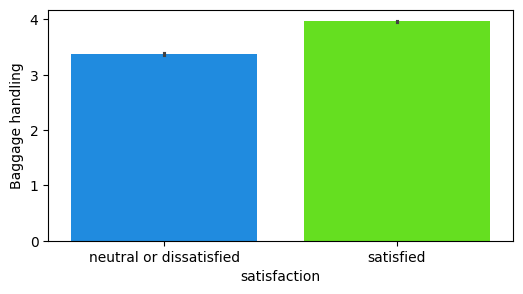

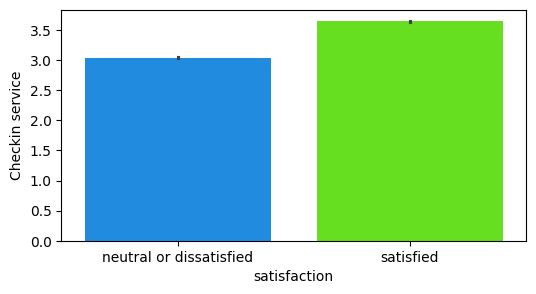

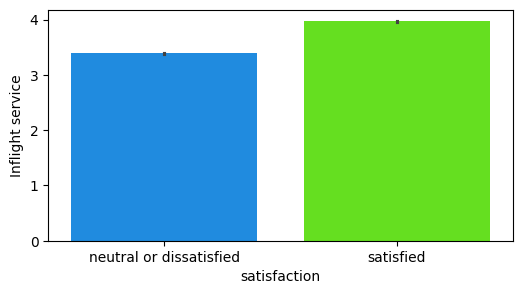

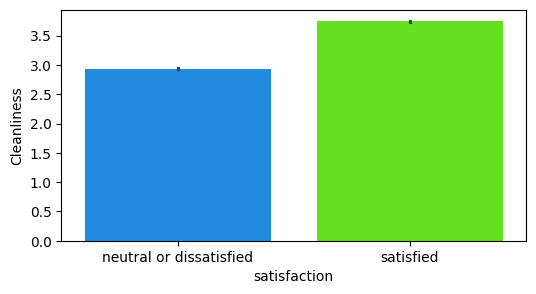

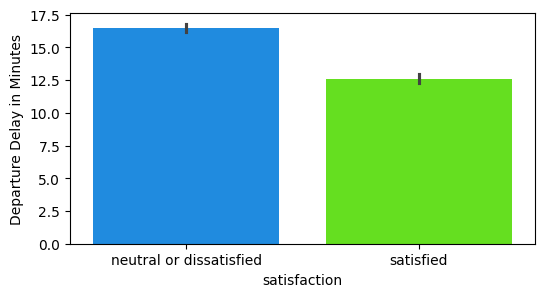

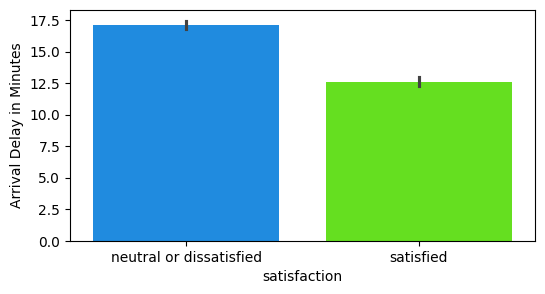

In [ ]:
for col in num_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.barplot(data=df, x='satisfaction', y=col, palette='gist_rainbow_r')

age, gate location, gender가 큰 영향을 주는 변수가 아니라는 것이 확실해짐.

+ 나는 departure/arrival time도 별반 차이가 없는 것 같은데 ..

In [ ]:
# Age, Gender, Gate lcation drop
df.drop(['Age','Gender','Gate location'], axis=1, inplace=True)

이제 이전에 가설로 설정한 변수들에 대한 가설검증을 시작하는 듯함.

In [ ]:
#pivoting
df.groupby('satisfaction')['Arrival Delay in Minutes'].mean()

,Arrival Delay in Minutes
satisfaction,
neutral or dissatisfied,17.127536
satisfied,12.630799


<Axes: xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

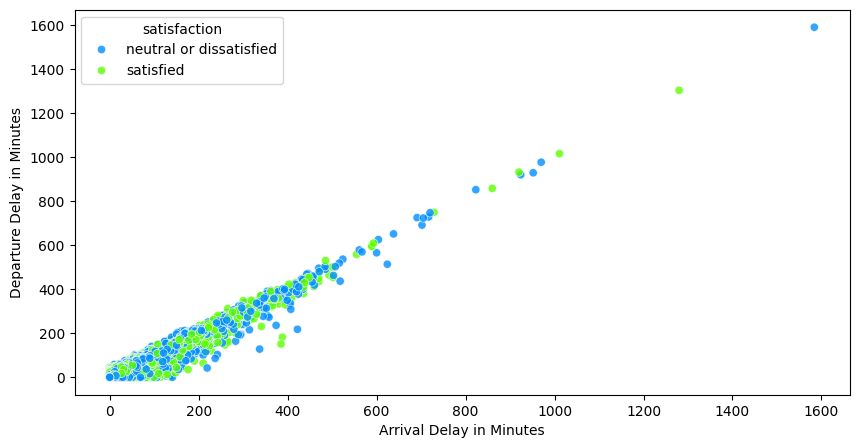

In [ ]:
plt.figure(figsize=(10,5), dpi = 100)
sns.scatterplot(data=df, x='Arrival Delay in Minutes', y='Departure Delay in Minutes', hue='satisfaction', palette='gist_rainbow_r', alpha=0.8)

✅ DPI(Dots Per Inch): 해상도 조절하는 설정값.

✅ 출발시간 지연과 도착 시간 지연은 선형관계임을 확인함(당연한 관계인 듯함)

🔎 지연시간이 1200분이상인데도 만족한 사람이 한 명 있음

(0.0, 1000.0)

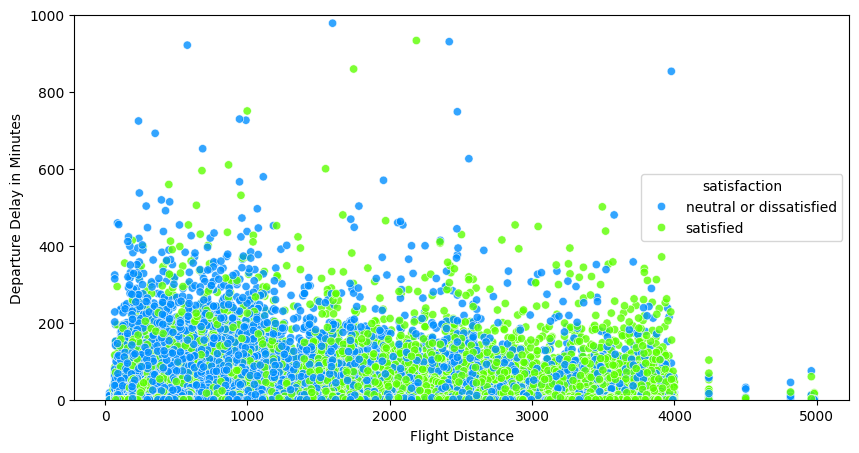

In [ ]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df, x='Flight Distance', y='Departure Delay in Minutes', hue='satisfaction', palette='gist_rainbow_r', alpha=0.8)
plt.ylim(0,1000)

🔎 비행 거리가 길어질 수록, 대부분의 승객들은 약간의 지연에 대해서는 괜찮아해보이는 것 같다.

➡️ 출발 시간의 지연은 장거리 비행에서 큰 요소로 작용하는 것 같지는 않지만, 단거리 여행객들 사이에서 출발 지연은 불만족의 원인이 되는 것을 확인할 수 있다.

**비즈니스 클래스의 만족도 분석**

In [ ]:
# df.groupby('Class').mean() #mean()함수는 수치형에만 적용되는데, 문자열이 있어서 오류가 발생함/ // 따라서 아래와 같이 수정해봄
df.groupby('Class').mean(numeric_only=True)


,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Class,,,,,,,,,,,,,,,,
Business,1675.976925,2.775315,2.905910,2.913964,3.323165,3.716541,3.760858,3.635437,3.679472,3.644498,3.842907,3.519178,3.844579,3.477600,14.398067,14.577272
Eco,743.439748,2.675067,3.199123,2.605241,3.086277,2.812985,3.138838,3.098256,3.120355,3.085720,3.450551,3.122002,3.463921,3.108097,15.160509,15.672183
Eco Plus,747.125567,2.767948,3.217507,2.661996,3.122631,2.889245,3.183747,3.141713,3.047638,3.061382,3.363758,3.017214,3.388444,3.130771,15.431545,16.088645


✅비즈니스 클래스 승객들은 모든 질문에 있어서 높은 평점을 줌. 따라서 클래스 변수는 만족도에 있어서 큰 변수로 작용하고 있음을 확인

# 결측치

이전 분석과정에서 departure delay in minutes가 arrival delay in minutes와 선형관계에 있음을 확인했기 때문에, ariival delay의 결측치에 대해서는 departure delay의 값으로 대체한다

In [ ]:
# 복사본 형성
df_copy = df.copy()

In [ ]:
# 2. 결측치 채우기
df['Arrival Delay in Minutes'].fillna(df['Departure Delay in Minutes'], inplace=True)

# 3. 결측치 확인
df.isna().sum()

<ipython-input-21-16f10472f6cd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(df['Departure Delay in Minutes'], inplace=True)


,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Food and drink,0
Online boarding,0
Seat comfort,0


<Axes: xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

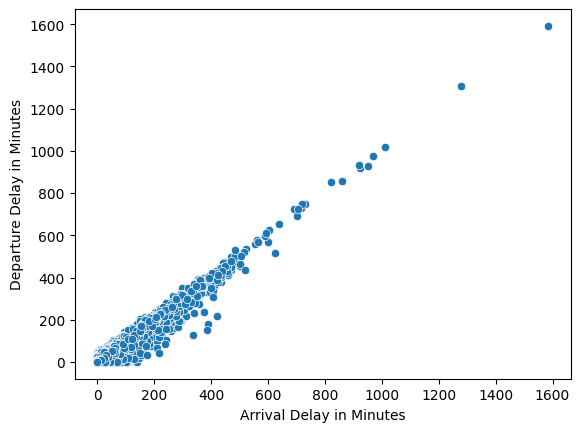

In [ ]:
# 4. 시각화를 위한 클린 데이터 생성
df_na = df[df['Arrival Delay in Minutes'].notna()]

# 5. 시각화
sns.scatterplot(data=df_na, x='Arrival Delay in Minutes', y='Departure Delay in Minutes')

흠...노트북상에서 코드가 생략된 것 같은데, 최대한 추측해서 실행했으나, 노트북처럼 완전한 y=x 그래프가 그려지진 않았음

# Encoding

In [ ]:
# Mapping (Label encoding의 한 방법)
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})

In [ ]:
# .get_dummies는 원핫인코딩 메서드
# object또는 category타입인 컬럼만 원핫인코딩의 대상이 됨.
df=pd.get_dummies(df)

In [ ]:
df.head()

,Customer Type,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,460,3,4,3,5,3,5,5,...,4,4,5,5,25,18.0,0,False,False,True
1,0,1,235,3,2,3,1,3,1,1,...,3,1,4,1,1,6.0,0,True,False,False
2,1,1,1142,2,2,2,5,5,5,5,...,4,4,4,5,0,0.0,1,True,False,False
3,1,1,562,2,5,5,2,2,2,2,...,3,1,4,2,11,9.0,0,True,False,False
4,1,1,214,3,3,3,4,5,5,3,...,4,3,3,3,0,0.0,1,True,False,False


In [ ]:
# 클래스 관련 컬럼만 선택해서 변환
df[['Class_Business', 'Class_Eco', 'Class_Eco Plus']] = df[['Class_Business', 'Class_Eco', 'Class_Eco Plus']].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Customer Type                      103904 non-null  int64  
 1   Type of Travel                     103904 non-null  int64  
 2   Flight Distance                    103904 non-null  int64  
 3   Inflight wifi service              103904 non-null  int64  
 4   Departure/Arrival time convenient  103904 non-null  int64  
 5   Ease of Online booking             103904 non-null  int64  
 6   Food and drink                     103904 non-null  int64  
 7   Online boarding                    103904 non-null  int64  
 8   Seat comfort                       103904 non-null  int64  
 9   Inflight entertainment             103904 non-null  int64  
 10  On-board service                   103904 non-null  int64  
 11  Leg room service                   1039

In [ ]:
df.shape

(103904, 22)

# 모델링

In [ ]:
X= df.drop('satisfaction', axis=1)
y= df['satisfaction']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay #from sklearn.metrics import plot_confusion_matrix는 삭제
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
pipeline = Pipeline([
                ('std_scaler', StandardScaler()),
                    ])
scaled_X_train = pipeline.fit_transform(X_train)
scaled_X_test = pipeline.fit_transform(X_test)

**의문점**
```
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
```
스케일러 하나만 파이프라인에 넣을 거면 이렇게 하는거랑 똑같지 않나?

In [ ]:
df['satisfaction'].value_counts()

,count
satisfaction,
0,58879
1,45025


In [ ]:
kfold = StratifiedKFold(n_splits=10) #일반 KFold보다 더 공정하고 안정적으로 평가할 수 있게 도와주는 방법

In [ ]:
# 여러가지 머신러닝 모델들을 한번에 비교하기 위한 단계
random_state = 2
classifiers = []
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(XGBClassifier(random_state=random_state))

#교차검증 #corss_val_score(): 교차검증으로 모델 평가 # cv=kfold : kfold검증을 몇번으로 나눌지 지정(위에서 10번이라고 설정), #n_jobs=4: 병렬로 몇 개의 코어를 사용할 것인지 설정
# 따라서 cv_results에는 각 모델의 교차검증 정확도가 리스트 형태로 들어감.
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, scaled_X_train, y_train, scoring = 'accuracy', cv=kfold, n_jobs=4))

# 평균 정확도 & 표준편차 계산
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

#결과 DF 생성
cv_res = pd.DataFrame({
        "CorssValMeans": cv_means,
        "CorssValerrors": cv_std,
        "Algorithm": ["LogisticRegression", "KNeighbors", "SVC", "DecisionTree",
        "AdaBoost", "RandomForest", "GradientBoosting", "XGBoost"
        ]
})


#시각화
g= sns.barplot("CorssValMeans","Algorithm", data=cv_res, palette="Set3", orient="h", **{'xerr':cv_std}) #xerr: 막대에 오차막대 포함
g.set_xlabel("Mean Accuracy")
g.set_title("Corss validation scores")


KeyboardInterrupt: 

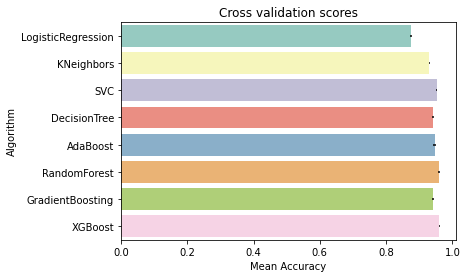

저 코드가 안돌아가서 그냥 결과 그래프 첨부함.
그래프 상에서, XGBoost의 성능이 가장 좋은 것을 확인함

In [ ]:
model_xgb = XGBClassifier(random_state = 2)
model_xgb.fit(scaled_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [ ]:
pred_xgb = model_xgb.predict(scaled_X_test)
accuracy_score(y_test, pred_xgb)

0.7084837110822386

...? 원본에서는 96%가 ㅏ나왔는데..

In [ ]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.66      0.98      0.79     11713
           1       0.94      0.35      0.51      9068

    accuracy                           0.71     20781
   macro avg       0.80      0.67      0.65     20781
weighted avg       0.78      0.71      0.67     20781



Text(0.5, 1.0, 'Feature Importance')

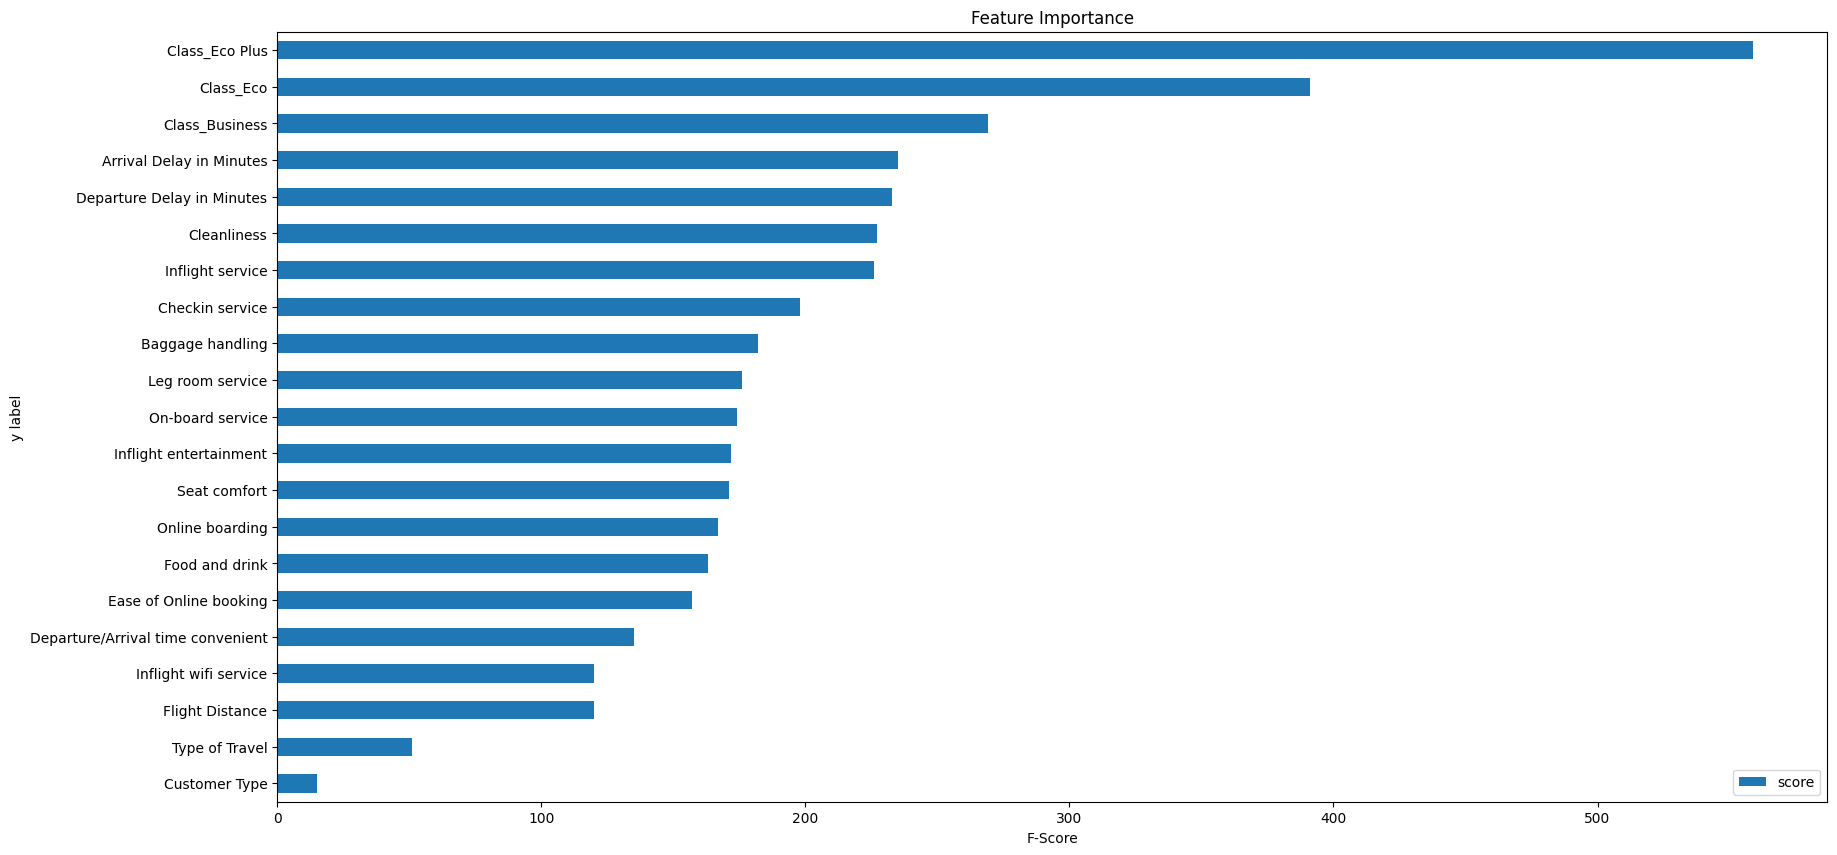

In [ ]:
orig_feature_names = X_train.columns
feature_important = model_xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score")
ax =data.plot(kind='barh', figsize = (20,10))
ax.set_yticklabels(orig_feature_names);

ax.set(xlabel="F-Score", ylabel="y label")
ax.set_title('Feature Importance')

✔️bookster(): xgb 특유의 구조

✔️get_score(importance_type='weight'): 각 변수가 분할(split(10번))에 몇 번 사용되었는지를 기준으로 중요도를 딕셔너리 형태로 반환

✔️ keys, values: 반환된 딕셔너리 형태에서 키, 값으로 나눔

즉, XGBoost가 어떤 변수를 자주 사용했는지를 기준으로, 중요한 변수를 순서대로 시각화한 그래프

🔎 따라서, Class of travel, Arrivla/Departure delays, Services provided in the flight가 승객의 만족도에 가장 큰 영향을 주는 변수임을 확인함!!

이렇게 만족도에 가장 큰 영향을 주는 변수를 찾아내는 방식은 처음 접해봤다. 항상 시각화를 한 다음에, 수치검증으로 유의미한 관계임을 확인했지만, 모델링을 통해서 검증할 수 있다는것은 처음해보는 방식이었다!!🌱